## Assignment 11
## Name: Gaurav Ganesh Bhogale
## Referral ID: SIRSS2101

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets,layers,models,Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2

In [2]:
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.callbacks import TensorBoard

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [7]:
Y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes[5]

'dog'

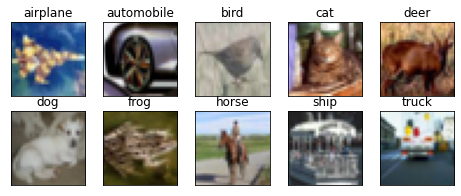

In [12]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = 10
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [13]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (20,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

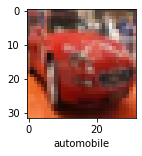

In [14]:
plot_sample(X_train, y_train, 5)

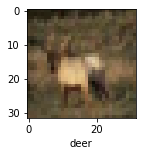

In [15]:
plot_sample(X_train, y_train, 3)

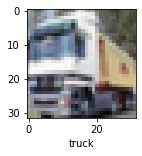

In [16]:
plot_sample(X_train, y_train, 1)

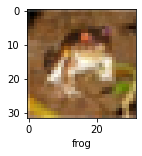

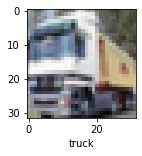

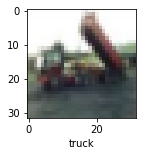

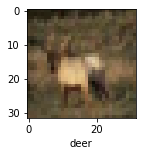

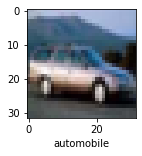

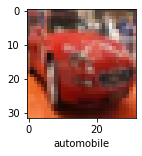

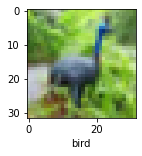

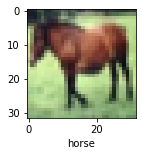

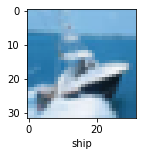

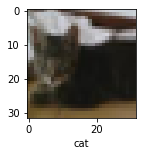

In [17]:
for i in range(10):
  plot_sample(X_train, y_train, i)

In [18]:
X_train = X_train / 255
X_test = X_test / 255
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [19]:
model_ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(2000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

model_ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

MODEL_1 = model_ann.fit(
    X_train, y_train, epochs=10
)

Epoch 1/10
1563/1563 [==============================] - 188s 119ms/step - loss: 1.8078 - accuracy: 0.3557
Epoch 2/10
1563/1563 [==============================] - 178s 114ms/step - loss: 1.6125 - accuracy: 0.4268
Epoch 3/10
1563/1563 [==============================] - 172s 110ms/step - loss: 1.5258 - accuracy: 0.4604
Epoch 4/10
1563/1563 [==============================] - 164s 105ms/step - loss: 1.4640 - accuracy: 0.4814
Epoch 5/10
1563/1563 [==============================] - 155s 99ms/step - loss: 1.4094 - accuracy: 0.5024
Epoch 6/10
1563/1563 [==============================] - 161s 103ms/step - loss: 1.3606 - accuracy: 0.5186
Epoch 7/10
1563/1563 [==============================] - 154s 99ms/step - loss: 1.3183 - accuracy: 0.5367
Epoch 8/10
1563/1563 [==============================] - 158s 101ms/step - loss: 1.2824 - accuracy: 0.5470
Epoch 9/10
1563/1563 [==============================] - 160s 103ms/step - loss: 1.2429 - accuracy: 0.5605
Epoch 10/10
1563/1563 [=========================